# F1 Win Prediction Project
#### Alex Boardman - BrainStation

## Table of Contents

1. [**Introduction**](#1)
    - Project Description
    - Data Description
2. [**Acquiring and Loading Data**](#2)
	- Importing Libraries and Notebook Setup
    - Loading Data
    - Basic Data Exploration
    - Areas to Fix
3. [**Basic Data Proprocessing**](#3)
4. [**Data Analysis**](#4)
5. [**Conclusion**](#5)
    - Insights
    - Suggestions
    - Possible Next Steps
6. [**Epilogue**](#6) 
    - References
    - Versioning

---

# 1

### Introduction

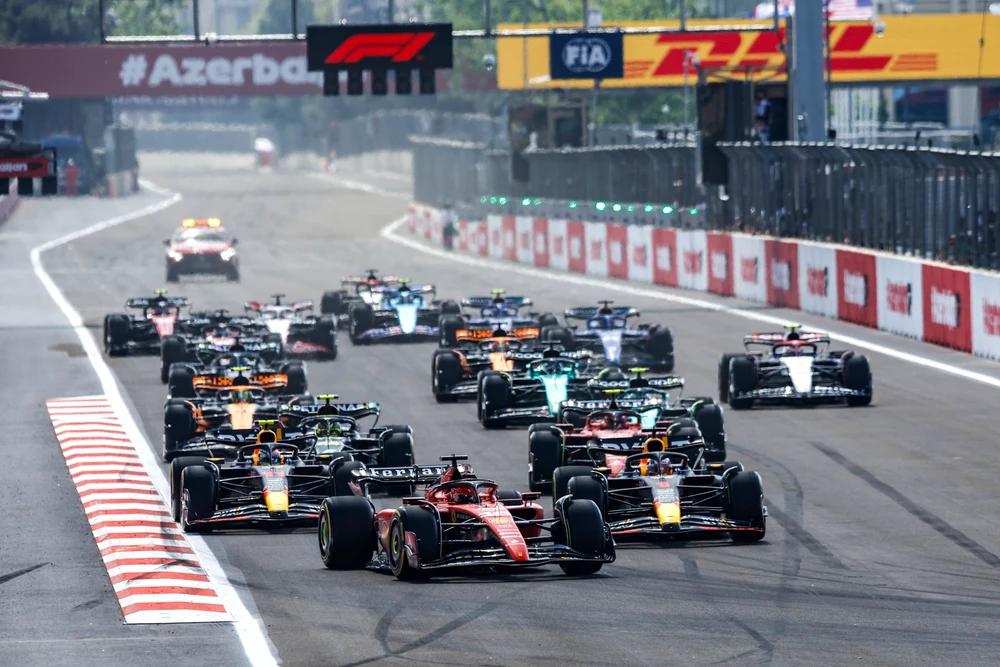## 

### Project Description

**Goal/Purpose:** 

This executive overview outlines a project focused on leveraging data science & machine learning to predict Formula 1 race outcomes, targeting the intricate blend of sports analytics and data science. By analysing large datasets including historical race data, weather conditions, and team dynamics, the initiative aims to refine prediction accuracy and address the challenges of incomplete data and the unpredictable nature of racing. The project serves Formula 1 teams, sports analysts, the $235 billion global sports betting market, and fans by offering enhanced predictive insights for race strategy optimization, betting odds formulation, and fan engagement. Utilizing data sources from F1, OpenF1 and Ergast F1, the project aims to integrate performance metrics, team and driver information, and contextual race details, to offer a comprehensive approach to predicting and understanding Formula 1 race outcomes.
<p>&nbsp;</p>

### **Questions to be Answered:**

- **Can Machine Learning Improve Race Outcome Predictions?**

How can machine learning models utilize extensive datasets, including historical race data, driver and constructor standings, weather conditions, and qualifying times, to predict Formula 1 race outcomes more accurately than traditional methods?
- **What Factors Most Influence Race Outcomes?**

Among the myriad of factors such as team strategies, driver performance, car development, weather conditions, and circuit characteristics, which have the most significant impact on predicting the outcomes of races?


<p>&nbsp;</p>

### **Assumptions/Methodology/Scope:** 

Briefly describe assumptions, processing steps, and the scope of this project.

<p>&nbsp;</p>

### Data Description

**Content:** 

This dataset is a _(filetype) file of _(how many) data points which contains ___. 

<p>&nbsp;</p>

**Description of Attributes:** 

Here you can describe what each column represents.

| Column  | Description |
| :------ | :---------- |
| column1 | description1 |

<p>&nbsp;</p>

**Acknowledgements:** 

This dataset is provided by _(. The original dataset was scraped by _) and the original source can be found on [website](https://website.link).

---

# 2

## Acquiring and Loading Data
### Importing Libraries and Notebook Setup

In [63]:
# Install libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading Dataset

In [64]:
race_predictor_df = pd.read_excel('C:/Users/Alex/OneDrive/BrainStation/Data_Science_Bootcamp/Capstone_Project/capstone-Aboard89/data/f1_data_capstone_v1.xlsx')

### Basic Data Exploration

In [65]:
# # Show rows and columns count
print(f"Rows count: {race_predictor_df.shape[0]}\nColumns count: {race_predictor_df.shape[1]}")

Rows count: 11235
Columns count: 37


The image displays a code snippet from a Jupyter Notebook where a user is conducting basic data exploration on a DataFrame named `race_predictor_df`. The code uses the `shape` attribute of the DataFrame to print out the number of rows and columns it contains, which are 11235 rows and 37 columns respectively.

In [66]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,81009,NaN,3,31.83,1,Finished,NaN,0,NaN,NaN
1,1,4722,240,1995,Brazilian Grand Prix,brazil,Brazilian,14,6,David Coulthard,...,82005,NaN,1,34.17,1,Finished,NaN,0,NaN,NaN
2,1,4723,240,1995,Brazilian Grand Prix,brazil,Brazilian,77,28,Gerhard Berger,...,83007,NaN,2,38.94,11,+1 Lap,NaN,0,NaN,NaN
3,1,4725,240,1995,Brazilian Grand Prix,brazil,Brazilian,55,27,Jean Alesi,...,83002,NaN,2,35.50,11,+1 Lap,NaN,0,NaN,NaN
4,1,4726,240,1995,Brazilian Grand Prix,brazil,Brazilian,87,7,Mark Blundell,...,83003,NaN,2,37.53,11,+1 Lap,NaN,0,NaN,NaN


In [67]:
race_predictor_df.tail()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
11230,527,26080,1110,2023,Belgian Grand Prix,belgium,Belgian,825,20,Kevin Magnussen,...,111000,NaN,2,23.61,1,Finished,NaN,0,NaN,NaN
11231,527,26081,1110,2023,Belgian Grand Prix,belgium,Belgian,817,3,Daniel Ricciardo,...,111000,NaN,2,23.07,1,Finished,NaN,0,NaN,NaN
11232,527,26082,1110,2023,Belgian Grand Prix,belgium,Belgian,858,2,Logan Sargeant,...,110005,NaN,3,23.54,1,Finished,NaN,0,NaN,NaN
11233,527,26084,1110,2023,Belgian Grand Prix,belgium,Belgian,832,55,Carlos Sainz,...,113001,NaN,1,23.30,130,Collision damage,NaN,0,NaN,NaN
11234,527,26085,1110,2023,Belgian Grand Prix,belgium,Belgian,857,81,Oscar Piastri,...,Not Found,NaN,0,0.00,130,Collision damage,NaN,0,NaN,NaN


The `race_predictor_df.head()` and `race_predictor_df.tail()` tables present the top and bottom entries of a dataset concerning Formula 1 race outcomes. 

- The dataset appears to span from 1995 to 2023 (although the full) and includes various features such as race ID, year, race name, driver information, and performance metrics like fastest laps and pit stops. 
- Notably, there are missing values (represented as `NaN`) in several columns, including **'fastest lap from last race'**, **'team rank first race after major regulation change'**, and **'team development rank last year'**. This indicates that the dataset has incomplete records in these areas. 
- The data also contains results-related information, such as the race outcome ('Finished', 'Differential', 'Collision damage'), and details about regulation changes, which may be helpful for predicting future race results. 
- The presence of 'Not Found' entries for the **'fastestLap_ms'** field suggests missing or unrecorded lap times. 

Overall, the dataset provides a comprehensive historical account of Formula 1 races that could be used to forecast race outcomes using machine learning models.

#### Check Data Types

In [68]:
# # Show data types
race_predictor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11235 entries, 0 to 11234
Data columns (total 37 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Index                                               11235 non-null  int64  
 1   resultId                                            11235 non-null  int64  
 2   raceId                                              11235 non-null  int64  
 3   year                                                11235 non-null  int64  
 4   race                                                11235 non-null  object 
 5   country                                             11235 non-null  object 
 6   nationality_of_circuit                              11235 non-null  object 
 7   driverId                                            11235 non-null  int64  
 8   number                                              11235 non-null  int64  


There are a total of 37 columns.
- **Integer columns (int64)** are 15 in total.They seem to have a complete set of 11235 non-null values, indicating no missing values and likely a full set of records.
- **Float columns (float64)** are 8 in total. The columns also seem to have no missing values but watch out for zeroes that might represent missing or placeholder values.
- **Object columns (string or mixed types)** are 14 in total. These include categorical variables and text strings. The column Former_F1_World_Champion notably has many missing values (only 2537 non-null out of 11235), which suggests that not all drivers in the dataset become world champions.

The dataset has 11235 entries, suggesting that for most columns, data is complete. However, some columns, like Former_F1_World_Champion, have missing values, indicated by a non-null count lower than the total entry count.
The memory usage is 3.4+ MB.

#### Check Missing Data

In [69]:
# # Print percentage of missing values

missing_percent = race_predictor_df.isna().mean().sort_values(ascending=False)
print('---- Percentage of Missing Values (%) -----')
if missing_percent.sum():
    print(missing_percent[missing_percent > 0] * 100)
else:
    print('None')

---- Percentage of Missing Values (%) -----
team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781
dtype: float64


The table displayed is a summary of missing data within your `race_predictor_df` DataFrame, showing the percentage of missing values for each column. 

- Several columns, such as 'team_development_rank_last_year', 'status_finished_last_race', 'points_in_previous_race', 'laps_completed_in_previous_races', 'fastest_lap_from_last_race', 'team_rank_first_race_after_major_regulation_change', and 'Former_F1_World_Champion' have a high percentage of missing values, with some up to 100%, indicating that they are completely missing data across all entries. 
- The 'Former_F1_World_Champion' column has missing data in approximately 77.41% of its entries. 

This information is crucial for data cleaning and preparation before any further analysis or machine learning, as it highlights the need for addressing these missing values either by imputation, deletion, or acquiring more complete data.

#### Check for Duplicate Rows

In [70]:
# # Show number of duplicated rows
print(f"No. of entirely duplicated rows: {race_predictor_df.duplicated().sum()}")

# # Show duplicated rows
race_predictor_df[race_predictor_df.duplicated()]

No. of entirely duplicated rows: 0


,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year


The code snippet you provided checks for duplicate rows in a pandas DataFrame named `race_predictor_df`. It performs two steps:

1. **Checks for the number of duplicates:** It uses the `.duplicated()` method to identify all rows that are entirely identical to another row in the DataFrame. The `.sum()` method then counts the number of these duplicates, and the output (`No. of entirely duplicated rows: 0`) indicates there are **no** rows that are completely identical in this DataFrame.

2. **Shows the duplicate rows:** Although there are no **entirely** duplicated rows, the second line attempts to display any rows that were marked as duplicates by the `.duplicated()` method. Since there are none, the output is an empty DataFrame, meaning there are no partially or entirely duplicate rows in `race_predictor_df`.


#### Check Uniqueness of Data

In [71]:
# # Print the percentage similarity of values (the lower %, the better)
num_unique = race_predictor_df.nunique().sort_values()
print('---- Percentage Similarity of Values (%) -----')
print(100/num_unique)

---- Percentage Similarity of Values (%) -----
team_development_rank_last_year                             inf
team_rank_first_race_after_major_regulation_change          inf
laps_completed_in_previous_races                            inf
fastest_lap_from_last_race                                  inf
points_in_previous_race                                     inf
status_finished_last_race                                   inf
home_race                                             50.000000
major_regulation_change                               50.000000
number_of_pit_stops                                   14.285714
Former_F1_World_Champion                              10.000000
constructor_nationality                                7.142857
engine_manufacturer                                    4.761905
F2_champion                                            4.347826
positionOrder                                          3.846154
starting_grid_position                                 3.

The chart illustrates the percentage similarity of values within each column of the `race_predictor_df` DataFrame, which assesses the uniqueness of the data by calculating the inverse of the proportion of unique entries. Columns with `inf` (infinity) suggest a division by zero, indicating that these columns may have all unique values or no data at all. Columns like 'home_race' and 'major_regulation_change' have high similarity percentages, indicating less uniqueness and a higher repetition of values. On the contrary, columns at the bottom of the list, such as 'raceId', 'Index', 'fastestLap_ms', and 'resultId', show very low percentages, reflecting a high level of uniqueness — these columns likely contain identifiers or time-based data with a wide range of values. This understanding of data uniqueness is essential for feature selection, as columns with high similarity might carry less discriminative information for predictive modeling, whereas highly unique columns might be identifiers or carry significant unique information per entry.

#### Check Data Range

In [72]:
# # Print summary statistics
race_predictor_df.describe(include='all')
# skim(race_predictor_df)

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,status_finished_last_race,major_regulation_change,team_rank_first_race_after_major_regulation_change,team_development_rank_last_year
count,11235.000000,11235.000000,11235.000000,11235.000000,11235,11235,11235,11235.000000,11235.000000,11235,...,11235,0.0,11235.000000,11235.000000,11235.000000,11235,0.0,11235.000000,0.0,0.0
unique,NaN,NaN,NaN,NaN,43,35,32,NaN,NaN,153,...,605,NaN,NaN,NaN,NaN,109,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Spanish Grand Prix,great-britain,Italian,NaN,NaN,Fernando Alonso,...,Not Found,NaN,NaN,NaN,NaN,Finished,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,621,639,676,NaN,NaN,370,...,2125,NaN,NaN,NaN,NaN,4755,NaN,NaN,NaN,NaN
mean,259.636938,13313.263017,535.897107,2009.244148,NaN,NaN,NaN,279.776947,17.213974,NaN,...,NaN,NaN,1.491500,19.593478,9.583801,NaN,NaN,0.105652,NaN,NaN
std,151.453060,10307.887281,419.741753,8.232487,NaN,NaN,NaN,368.937558,16.986888,NaN,...,NaN,NaN,1.154981,12.602978,16.990933,NaN,NaN,0.307405,NaN,NaN
min,1.000000,1.000000,1.000000,1995.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,...,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN
25%,127.000000,2809.500000,136.000000,2002.000000,NaN,NaN,NaN,16.000000,7.000000,NaN,...,NaN,NaN,1.000000,0.000000,1.000000,NaN,NaN,0.000000,NaN,NaN
50%,262.000000,20462.000000,342.000000,2010.000000,NaN,NaN,NaN,44.000000,14.000000,NaN,...,NaN,NaN,2.000000,23.560000,5.000000,NaN,NaN,0.000000,NaN,NaN
75%,388.000000,23272.500000,964.000000,2016.000000,NaN,NaN,NaN,815.000000,21.000000,NaN,...,NaN,NaN,2.000000,28.195000,11.000000,NaN,NaN,0.000000,NaN,NaN


# !*!*!* Need to go into more detail here *!*!*!*!*!
The `describe()` method output provides summary statistics for the `race_predictor_df` DataFrame, which includes count, unique, top, freq, mean, std, min, 25%, 50%, 75%, and max for each column. Numeric columns like 'year', 'number', 'number_of_pit_stops', 'average_time_lost_in_pits', 'statusId', and 'major_regulation_change' provide statistical measures such as mean and standard deviation, indicating the central tendency and dispersion of values. Columns with non-numeric data, such as 'race', 'country', and 'driver_name', show the count of unique values, the most frequent value ('top'), and how often it appears ('freq'). Several columns have a count of 0 for unique values, indicating they may be completely empty or not applicable for the unique count. This table is a critical starting point for exploratory data analysis, helping to understand the distribution of data, identify potential data quality issues, and inform preprocessing steps such as handling missing values or outlier detection.

## Data Preparation

**Step 1 - Add Constructor information**

# Go into more detail here
### Areas to Fix

- **Data Types**: Ensure that each column has the appropriate data type for the kind of data it contains. For instance, categorical data should not be typed as numeric and vice versa. If any columns are meant to be categorical or date/time but are currently recognized as 'object' or 'int64', they should be converted to the proper data type.

- **Missing Data**: Your dataset contains columns with high percentages of missing values, such as 'team_development_rank_last_year' and 'status_finished_last_race'. You need to decide how to handle these, whether by imputation, deletion, or acquisition of more data if possible. For columns with a small amount of missing data, imputation might be feasible, while for those with a large percentage, it might be more appropriate to consider dropping the column.

- **Duplicate Rows**: Check for any duplicate rows that might skew your analysis. If duplicates are not meaningful for your study, they should be removed.

- **Uniqueness of Data**: Some columns like 'raceId' and 'driverId' are expected to have a high degree of uniqueness and serve as identifiers. Other columns that should normally have a diverse set of values but show a high degree of similarity (low uniqueness) may not be very informative and could potentially be candidates for removal.

- **Data Range**: Verify the range of values in numerical columns. For instance, if 'year' has a minimum value that's in the future or a past date that's not plausible, these could be data entry errors. Check for outliers that don't make sense within the context of the data.

- **Consistency**: Ensure that the data is consistent throughout the dataset. For example, if 'country' and 'nationality_of_circuit' are supposed to represent the same information, they should be consistent and possibly merged if they are redundant.

- **Correctness**: For columns with 'inf' values for uniqueness, ensure they are correctly calculated. An 'inf' value might indicate a division by zero error, suggesting that the column might be entirely unique or entirely composed of a single value, each of which has different implications.

- **Data Integrity**: Ensure that related columns correctly reflect relationships in the data. For example, 'number_of_pit_stops' should correlate with 'average_time_lost_in_pits' in a way that makes sense.

- **Normalization/Standardization**: For machine learning purposes, you may need to standardize or normalize numerical data to ensure that the scale of the data does not unduly influence the model.

---

# 3

## Basic Data Preprocessing/Cleaning

### Handling Missing Values

Here are the columns with missing values: 

team_development_rank_last_year                       100.000000
status_finished_last_race                             100.000000
points_in_previous_race                               100.000000
laps_completed_in_previous_races                      100.000000
fastest_lap_from_last_race                            100.000000
team_rank_first_race_after_major_regulation_change    100.000000
Former_F1_World_Champion                               77.418781



#### Drop columns for Feature Engineering (see F1_preprocessing notebook): 
1) team_development_rank_last_year, 
2) status_finished_last_race
3) team_rank_first_race_after_major_regulation_change

We didn't have information for this data after the Data Collection stage. I will drop these columns and give them as ideas for Feature Engineering

In [73]:
# Dropping specified columns from the DataFrame
race_predictor_df = race_predictor_df.drop(['team_development_rank_last_year', 
                                            'status_finished_last_race', 
                                            'team_rank_first_race_after_major_regulation_change'], 
                                           axis=1)


#### Former_F1_World_Champion

In [74]:
# Former_F1_World_Champion column

# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
race_predictor_df['Former_F1_World_Champion'] = race_predictor_df['Former_F1_World_Champion'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [75]:
race_predictor_df['Former_F1_World_Champion']

0        1
1        0
2        0
3        0
4        0
        ..
11230    0
11231    0
11232    0
11233    0
11234    0
Name: Former_F1_World_Champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

In [76]:
race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,laps_completed_in_previous_races,time,milliseconds,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,major_regulation_change
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,NaN,01:38:34.154000,5914154,81009,NaN,3,31.83,1,Finished,0
1,1,4722,240,1995,Brazilian Grand Prix,brazil,Brazilian,14,6,David Coulthard,...,NaN,11.06,5925214,82005,NaN,1,34.17,1,Finished,0
2,1,4723,240,1995,Brazilian Grand Prix,brazil,Brazilian,77,28,Gerhard Berger,...,NaN,\N,\N,83007,NaN,2,38.94,11,+1 Lap,0
3,1,4725,240,1995,Brazilian Grand Prix,brazil,Brazilian,55,27,Jean Alesi,...,NaN,\N,\N,83002,NaN,2,35.50,11,+1 Lap,0
4,1,4726,240,1995,Brazilian Grand Prix,brazil,Brazilian,87,7,Mark Blundell,...,NaN,\N,\N,83003,NaN,2,37.53,11,+1 Lap,0


In [77]:
sorted_race_predictor_df = race_predictor_df.sort_values(by='Index', ascending=True)

In [78]:
sorted_race_predictor_df.head()

,Index,resultId,raceId,year,race,country,nationality_of_circuit,driverId,number,driver_name,...,laps_completed_in_previous_races,time,milliseconds,fastestLap_ms,fastest_lap_from_last_race,number_of_pit_stops,average_time_lost_in_pits,statusId,status,major_regulation_change
0,1,4721,240,1995,Brazilian Grand Prix,brazil,Brazilian,30,1,Michael Schumacher,...,NaN,01:38:34.154000,5914154,81009,NaN,3,31.83,1,Finished,0
25,1,4724,240,1995,Brazilian Grand Prix,brazil,Brazilian,57,8,Mika Häkkinen,...,NaN,\N,\N,Not Found,NaN,0,0.00,11,+1 Lap,0
24,1,4746,240,1995,Brazilian Grand Prix,brazil,Brazilian,94,23,Pierluigi Martini,...,NaN,\N,\N,Not Found,NaN,0,0.00,6,Gearbox,0
23,1,4745,240,1995,Brazilian Grand Prix,brazil,Brazilian,44,26,Olivier Panis,...,NaN,\N,\N,Not Found,NaN,0,0.00,4,Collision,0
22,1,4744,240,1995,Brazilian Grand Prix,brazil,Brazilian,49,30,Heinz-Harald Frentzen,...,NaN,\N,\N,84001,NaN,0,0.00,10,Electrical,0


#### points_in_previous_race

In [79]:
# create copy of sorted_race_predictor_df

points_in_previous_race_df = sorted_race_predictor_df.copy()

In [80]:
# points_in_previous_race column fix

# Initialize the "points_in_previous_race" column with NaN (or you can use 0 if you prefer)
points_in_previous_race_df['points_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "points_in_previous_race"
for index, row in points_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = points_in_previous_race_df[(points_in_previous_race_df['Index'] == previous_race_index) & (points_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the points_in_previous_race for the current race
    if not previous_race_row.empty:
        points_in_previous_race_df.at[index, 'points_in_previous_race'] = previous_race_row.iloc[0]['points']

In [81]:
# Check the first few rows to see if "points_in_previous_race" has been updated
points_in_previous_race_df[['Index', 'driver_name', 'points', 'points_in_previous_race']].head(50)

,Index,driver_name,points,points_in_previous_race
0,1,Michael Schumacher,10.0,<NA>
25,1,Mika Häkkinen,3.0,<NA>
24,1,Pierluigi Martini,0.0,<NA>
23,1,Olivier Panis,0.0,<NA>
22,1,Heinz-Harald Frentzen,0.0,<NA>
21,1,Domenico Schiattarella,0.0,<NA>
20,1,Eddie Irvine,0.0,<NA>
19,1,Ukyo Katayama,0.0,<NA>
17,1,Rubens Barrichello,0.0,<NA>
16,1,Bertrand Gachot,0.0,<NA>


That seems to have worked - now we have a column to see how many points the driver won in the last race.

#### laps_completed_in_previous_race

In [82]:
laps_in_previous_race_df = points_in_previous_race_df.copy()

In [83]:
# laps_in_previous_race column fix

# Initialize the "laps_in_previous_race" column with NaN (or you can use 0 if you prefer)
laps_in_previous_race_df['laps_in_previous_race'] = pd.NA

# Iterate through the DataFrame to fill in "laps_in_previous_race"
for index, row in laps_in_previous_race_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = laps_in_previous_race_df[(laps_in_previous_race_df['Index'] == previous_race_index) & (laps_in_previous_race_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the laps_in_previous_race for the current race
    if not previous_race_row.empty:
        laps_in_previous_race_df.at[index, 'laps_in_previous_race'] = previous_race_row.iloc[0]['laps']

In [84]:
# Check the first few rows to see if "points_in_previous_race" has been updated
laps_in_previous_race_df[['Index', 'driver_name', 'laps', 'laps_in_previous_race']].head(50)

,Index,driver_name,laps,laps_in_previous_race
0,1,Michael Schumacher,71,<NA>
25,1,Mika Häkkinen,70,<NA>
24,1,Pierluigi Martini,0,<NA>
23,1,Olivier Panis,0,<NA>
22,1,Heinz-Harald Frentzen,10,<NA>
21,1,Domenico Schiattarella,12,<NA>
20,1,Eddie Irvine,15,<NA>
19,1,Ukyo Katayama,15,<NA>
17,1,Rubens Barrichello,16,<NA>
16,1,Bertrand Gachot,23,<NA>


That seems to have worked - now we have a column to see how many laps the driver raced in the last race.

#### fastest_lap_from_last_race

In [85]:
fastest_lap_df = laps_in_previous_race_df.copy()

In [86]:
# fastest_lap_from_last_race column fix

# Initialize the "fastest_lap_from_last_race" column with NaN (or you can use 0 if you prefer)
fastest_lap_df['fastest_lap_from_last_race'] = pd.NA

# Iterate through the DataFrame to fill in "fastest_lap_from_last_race"
for index, row in fastest_lap_df.iterrows():
    current_index = row['Index']
    driver_name = row['driver_name']
    
    # Find the previous race index for the driver
    previous_race_index = current_index - 1
    
    # Find the row of the previous race for the driver, if it exists
    previous_race_row = fastest_lap_df[(fastest_lap_df['Index'] == previous_race_index) & (fastest_lap_df['driver_name'] == driver_name)]
    
    # If the driver has a previous race, update the fastest_lap_from_last_race for the current race
    if not previous_race_row.empty:
        fastest_lap_df.at[index, 'fastest_lap_from_last_race'] = previous_race_row.iloc[0]['fastestLap_ms']


In [87]:
# Check the first few rows to see if "points_in_previous_race" has been updated
fastest_lap_df[['Index', 'driver_name', 'fastestLap_ms', 'fastest_lap_from_last_race']].head(50)

,Index,driver_name,fastestLap_ms,fastest_lap_from_last_race
0,1,Michael Schumacher,81009,<NA>
25,1,Mika Häkkinen,Not Found,<NA>
24,1,Pierluigi Martini,Not Found,<NA>
23,1,Olivier Panis,Not Found,<NA>
22,1,Heinz-Harald Frentzen,84001,<NA>
21,1,Domenico Schiattarella,88005,<NA>
20,1,Eddie Irvine,83004,<NA>
19,1,Ukyo Katayama,84007,<NA>
17,1,Rubens Barrichello,83003,<NA>
16,1,Bertrand Gachot,87008,<NA>


#### F2_champion

In [93]:
f2_champion_df = fastest_lap_df.copy()

In [94]:
# F2_champion - turn to binary
# Convert the "F2_champion" column into a binary column: 1 if there's a name, 0 if the cell is already 0
f2_champion_df['F2_champion'] = f2_champion_df['F2_champion'].apply(lambda x: 1 if x != 0 else 0)


In [95]:
f2_champion_df['F2_champion']

0        0
25       0
24       0
23       0
22       0
        ..
11216    1
11215    0
11233    0
11223    0
11234    1
Name: F2_champion, Length: 11235, dtype: int64

Cleaned the values to show this as 1 or 0

---

In [97]:
# Turn to csv
f2_champion_df.to_csv('f2_champion_df.csv', index=False)

# 4

## Data Analysis

Here is where your analysis begins. You can add different sections based on your project goals.

### Exploring `Column Name`

**Observations**
- Ob 1
- Ob 2
- Ob 3

#### Univariate Analysis

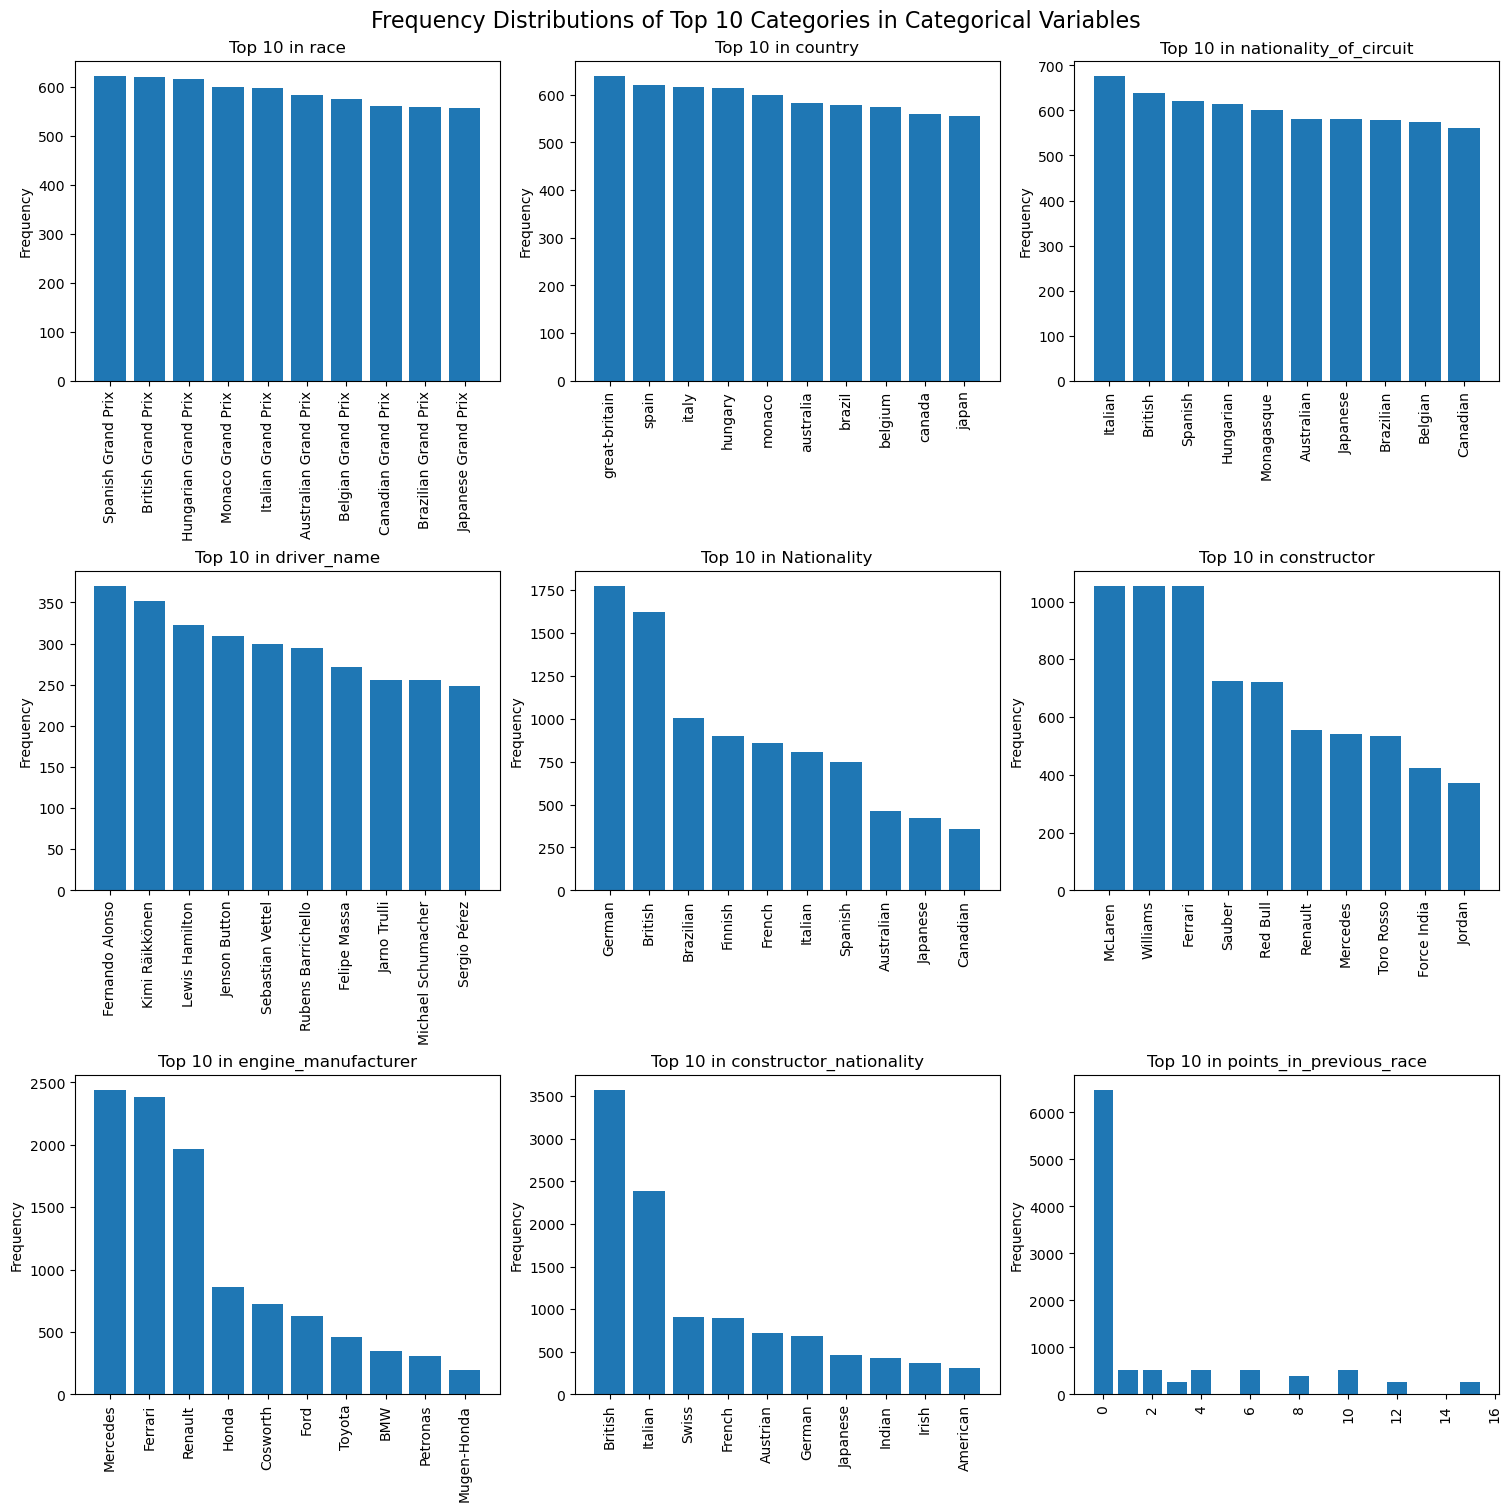

In [116]:
import matplotlib.pyplot as plt

# Identify categorical variables (assumed as object dtype here)
categorical_vars = f2_champion_df.select_dtypes(include=['object']).columns

# Limit the number of categorical variables to the first 9 for a 3x3 subplot grid
categorical_vars = categorical_vars[:9]  # Select only the first 9 categorical variables

ncols = 3  # number of columns in your subplot grid
nrows = 3  # number of rows in your subplot grid (fixed at 3 for a 3x3 grid)

# Create subplots with 3 rows and 3 columns
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, nrows*5), constrained_layout=True)
fig.suptitle('Frequency Distributions of Top 10 Categories in Categorical Variables', fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot the top 10 categories for each of the first 9 categorical variables
for i, var in enumerate(categorical_vars):
    # Generate frequency counts for the categorical variable
    counts = f2_champion_df[var].value_counts().head(10)
    
    # Plot the bar chart for the top 10 categories
    axes[i].bar(counts.index, counts.values)
    axes[i].set_title(f'Top 10 in {var}')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Hide any unused subplots if the number of categorical variables is less than 9
for j in range(len(categorical_vars), len(axes)):
    axes[j].set_visible(False)

plt.show()




- **Top 10 in constructor** : The bar chart shows the frequency of occurrences for the top 10 constructors, with McLaren having the highest frequency, surpassing 1000. Williams, Ferrari, and Sauber follow, indicating their significant presence, but each with a notably lower frequency than McLaren, suggesting McLaren's dominance or higher activity within the context measured.

- **Top 10 in Nationality** : The chart illustrates that German and British nationalities are the most prevalent in the dataset, suggesting a significant representation in the racing domain, which may reflect a robust motorsports culture or successful driver development programs in these countries. The subsequent decline in frequency for other nationalities such as Brazilian, Finnish, and French indicates a less dominant, yet still notable, presence in the sport.

- **Top 10 in engine manufacturer** : The chart indicates that Mercedes is the most frequently listed engine manufacturer, which could suggest their dominance or preferred choice in engine supply within the dataset's context. Ferrari follows as the second most common and Renault in third, showing competitive presences, but with a slightly lower frequency compared to Mercedes, highlighting a potential gap in engine supplier representation.

- **Top 10 in constructor nationality** : The chart presents the frequencies of the top 10 constructor nationalities, showing a clear dominance of British constructors with a frequency over 3000. Italian constructors come in second, but with less than half the frequency of the British, highlighting a significant concentration of constructors' nationalities being British or Italian in each row of data.

- **Top 10 in driver_name** : The chart shows Fernando Alonso as the most frequently occurring driver in the top 10 category, indicating his prominence or consistent performance in the dataset. The relatively even distribution among the other top drivers suggests a competitive field with multiple individuals frequently appearing in the dataset.

- **Top 10 in race** :The bar chart displays a very uniform distribution of frequencies among the top 10 races, each with a frequency close to 600, indicating a similar level of occurrences or participation across these events. The Spanish Grand Prix has the highest frequency, marginally surpassing the others, while the Japanese Grand Prix has the lowest within the top 10, albeit not by a substantial margin.

- **Top 10 in points_in_previous_race** The chart indicates a high frequency of occurrences where drivers scored zero points in the previous race, suggesting that not scoring in a race is the most common outcome. The sharp drop-off in frequency for scoring any points highlights that achieving points in races is less common and may reflect the competitive nature of the sport or the scoring system's structure.

- **Top 10 in nationality_of_circuit** The chart illustrates that Italian circuits have the highest frequency, surpassing 650, suggesting they are the most utilized or featured within this dataset. The rest of the nationalities of circuits show a relatively even distribution, all falling between approximately 400 to 600 frequency, indicating a broad international representation in the dataset.

#### Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [117]:
f2_champion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11235 entries, 0 to 11234
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Index                             11235 non-null  int64  
 1   resultId                          11235 non-null  int64  
 2   raceId                            11235 non-null  int64  
 3   year                              11235 non-null  int64  
 4   race                              11235 non-null  object 
 5   country                           11235 non-null  object 
 6   nationality_of_circuit            11235 non-null  object 
 7   driverId                          11235 non-null  int64  
 8   number                            11235 non-null  int64  
 9   driver_name                       11235 non-null  object 
 10  F2_champion                       11235 non-null  int64  
 11  Former_F1_World_Champion          11235 non-null  int64  
 12  Nationali

In [ ]:
# Get only the numeric columns
numeric_df = bank_df2.select_dtypes(['int64','float64']).copy()

numeric_df.head()

### Bivariate Analysis

In [103]:
# Scatter plot to examine the relationship between 'milliseconds' and 'positionOrder'
plt.scatter(f2_champion_df['milliseconds'].astype(float), f2_champion_df['positionOrder'].astype(float))
plt.title('Milliseconds vs. Position Order')
plt.xlabel('Milliseconds')
plt.ylabel('Position Order')
plt.show()

# Correlation coefficient
print(f2_champion_df[['milliseconds', 'positionOrder']].astype(float).corr())


ValueError: could not convert string to float: '\\N'

TypeError: can only concatenate str (not "int") to str

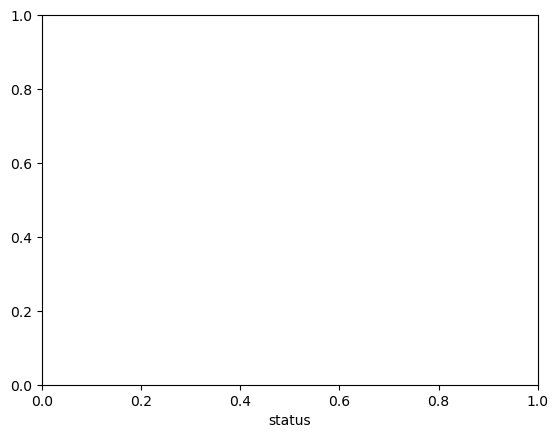

In [104]:
# Box plot for visualizing the distribution of 'milliseconds' across different 'status'
f2_champion_df.boxplot(column='milliseconds', by='status', rot=90)
plt.title('Race Completion Time by Status')
plt.xlabel('Status')
plt.ylabel('Milliseconds')
plt.show()


---

# 5

## Conclusion

### Insights 
State the insights/outcomes of your project or notebook.

### Suggestions

Make suggestions based on insights.

### Possible Next Steps
Areas to expand on:
- (if there is any)

---

# 6

## Epilogue

### References

This is how we use inline citation[<sup id="fn1-back">[1]</sup>](#fn1).

[<span id="fn1">1.</span>](#fn1-back) _Author (date)._ Title. Available at: https://website.com (Accessed: Date). 

> Use [https://www.citethisforme.com/](https://www.citethisforme.com/) to create citations.

### Versioning
Notebook and insights by (author).
- Version: 1.5.0
- Date: 2023-05-15

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b689e16b-e36c-4f8c-b17a-b3e876352669' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [69]:
# constructors_df and results_df have been read into pandas dataframes
res_cons = pd.merge(results_df, constructors_df, on='constructorId', how='inner')

# Rename the dataframe to res_cons as requested
res_cons = res_cons.rename(columns={'name': 'constructorName', 'nationality': 'constructorNationality', 'url': 'constructorUrl'})

res_cons.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,constructorRef,constructorName,constructorNationality,constructorUrl
0,1,18,1,1,22,1,1,1,1,10.0,...,5690616,39,2,1:27.452,218.300,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,5,18,5,1,23,3,5,5,5,4.0,...,5708630,43,1,1:27.418,218.385,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,25,19,5,1,23,8,3,3,3,6.0,...,5517005,19,7,1:35.922,208.031,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,27,19,1,1,22,9,5,5,5,4.0,...,5525103,53,3,1:35.462,209.033,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,49,20,5,1,23,5,5,5,5,4.0,...,5493759,49,1,1:33.193,209.062,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


**Step 2 - Add drivers_df**

In [78]:
# Merge the new res_cons dataframe with drivers_df
res_cons_drivers = pd.merge(res_cons, drivers_df, on='driverId', how='left')

res_cons_drivers.head(50)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,constructorNationality,constructorUrl,driverRef,number_y,code,forename,surname,dob,nationality,url
0,1,18,1,1,22,1,1,1,1,10.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,5,18,5,1,23,3,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
2,25,19,5,1,23,8,3,3,3,6.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
3,27,19,1,1,22,9,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,49,20,5,1,23,5,5,5,5,4.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
5,57,20,1,1,22,3,13,13,13,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
6,69,21,1,1,22,5,3,3,3,6.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
7,83,21,5,1,23,6,\N,R,17,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
8,90,22,1,1,22,3,2,2,2,8.0,...,British,http://en.wikipedia.org/wiki/McLaren,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
9,100,22,5,1,23,2,12,12,12,0.0,...,British,http://en.wikipedia.org/wiki/McLaren,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [86]:
res_cons_drivers.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000,26080.000000
mean,13041.372661,536.695667,266.277569,49.059663,11.167561,12.854141,1.906635,46.076687,17.476074
std,7530.008377,303.034639,272.581622,60.221056,7.232797,7.700068,4.219715,29.726058,26.129965
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6520.750000,294.750000,57.000000,6.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,13040.500000,519.000000,163.000000,25.000000,11.000000,12.000000,0.000000,53.000000,10.000000
75%,19560.250000,791.000000,364.000000,58.250000,17.000000,18.000000,2.000000,66.000000,14.000000
max,26085.000000,1110.000000,858.000000,214.000000,34.000000,39.000000,50.000000,200.000000,141.000000


**Step 3 - Add pit_stops_df**

In [92]:
pit_stops_df.describe()

,raceId,driverId,stop,lap,milliseconds
count,10089.000000,10089.000000,10089.000000,10089.000000,1.008900e+04
mean,962.774011,523.998910,1.759738,25.312023,7.534863e+04
std,81.144375,389.698555,0.916282,14.729775,2.788588e+05
min,841.000000,1.000000,1.000000,1.000000,1.289700e+04
25%,888.000000,18.000000,1.000000,13.000000,2.191400e+04
50%,958.000000,815.000000,2.000000,25.000000,2.357000e+04
75%,1035.000000,831.000000,2.000000,36.000000,2.620200e+04
max,1110.000000,858.000000,6.000000,78.000000,3.069017e+06


In [91]:
# First, we need to calculate the average milliseconds and count of stops for each driverId within each raceId in the pit_stops_df
pit_stops_grouped = pit_stops_df.groupby(['raceId', 'driverId'])['milliseconds'].agg(['mean', 'count']).reset_index()
pit_stops_grouped.rename(columns={'mean': 'average_pitstop_time', 'count': 'pitstop_count'}, inplace=True)
pit_stops_grouped.head(50)

,raceId,driverId,average_pitstop_time,pitstop_count
0,841,1,23213.000000,2
1,841,2,24046.000000,2
2,841,3,23716.000000,1
3,841,4,24055.000000,3
4,841,5,24865.000000,1
5,841,10,23792.000000,1
6,841,13,24145.666667,3
7,841,15,24873.500000,2
8,841,16,24924.500000,2
9,841,17,24058.666667,3


In [87]:
pit_stops_grouped.describe()

,raceId,driverId,average_pitstop_time,pitstop_count
count,4931.000000,4931.000000,4.931000e+03,4931.000000
mean,970.336240,539.642872,6.208772e+04,2.046035
std,79.398331,385.595695,1.725223e+05,0.983696
min,841.000000,1.000000,1.654900e+04,1.000000
25%,897.000000,20.000000,2.214775e+04,1.000000
50%,970.000000,817.000000,2.384300e+04,2.000000
75%,1037.000000,832.000000,2.732443e+04,3.000000
max,1110.000000,858.000000,3.055732e+06,6.000000


In [82]:


# Now, merge the new pit_stops_grouped dataframe with the res_cons_drivers dataframe
res_cons_drivers_pitstops = pd.merge(res_cons_drivers, pit_stops_grouped, on=['raceId', 'driverId'], how='inner')
res_cons_drivers_pitstops.head(20)

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,driverRef,number_y,code,forename,surname,dob,nationality,url,average_pitstop_time,pitstop_count
0,20780,841,1,1,3,2,2,2,2,18.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23213.000000,2
1,20784,841,18,1,4,4,6,6,6,8.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,20950.333333,3
2,20802,842,18,1,4,4,2,2,2,18.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,22451.333333,3
3,20808,842,1,1,3,2,8,8,8,4.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,23252.750000,4
4,20825,843,1,1,3,3,1,1,1,25.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,20659.333333,3
5,20828,843,18,1,4,2,4,4,4,12.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,21924.666667,3
6,20852,844,1,1,3,4,4,4,4,12.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,24909.250000,4
7,20854,844,18,1,4,6,6,6,6,8.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,21808.000000,3
8,20874,845,1,1,3,3,2,2,2,18.0,...,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,20364.250000,4
9,20875,845,18,1,4,5,3,3,3,15.0,...,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,20295.000000,3


In [84]:
res_cons_drivers_pitstops.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId,average_pitstop_time,pitstop_count
count,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4.931000e+03,4931.000000
mean,23425.269722,970.336240,539.642872,68.521192,10.800852,10.436423,5.178666,56.910971,8.416954,6.208772e+04,2.046035
std,1538.973287,79.398331,385.595695,84.909209,6.198450,5.855370,7.285034,12.420277,17.659081,1.725223e+05,0.983696
min,20779.000000,841.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.654900e+04,1.000000
25%,22082.500000,897.000000,20.000000,5.000000,5.000000,5.000000,0.000000,52.000000,1.000000,2.214775e+04,1.000000
50%,23415.000000,970.000000,817.000000,10.000000,11.000000,10.000000,1.000000,56.000000,1.000000,2.384300e+04,2.000000
75%,24751.500000,1037.000000,832.000000,131.000000,16.000000,15.000000,10.000000,66.000000,11.000000,2.732443e+04,3.000000
max,26084.000000,1110.000000,858.000000,214.000000,24.000000,24.000000,50.000000,87.000000,141.000000,3.055732e+06,6.000000
